# Customer Segmentation 

### 1. Data Processing

In [150]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

from collections import Counter
from kneed import KneeLocator
from datetime import datetime



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [63]:
path = ".\\customer_segmentation.csv"
df = pd.read_csv(path)

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [66]:
# Ajouter les colonnes directement au DataFrame d'origine
df.loc[:, 'Total_Kids'] = df['Kidhome'] + df['Teenhome']
df.loc[:, 'Age'] = datetime.now().year - df['Year_Birth']
df.loc[:, 'Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                                df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [67]:
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'Kidhome', 'Teenhome', 'Year_Birth', 'ID',
                   'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2'], inplace=True)


In [68]:
df.head()

,Education,Marital_Status,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Kids,Age,Total_Spending
0,Graduation,Single,58138.0,8,10,4,7,0,0,0,0,67,1617
1,Graduation,Single,46344.0,1,1,2,5,0,0,0,2,70,27
2,Graduation,Together,71613.0,8,2,10,4,0,0,0,0,59,776
3,Graduation,Together,26646.0,2,0,4,6,0,0,0,1,40,53
4,PhD,Married,58293.0,5,3,6,5,0,0,0,1,43,422


In [69]:
df.shape

(2240, 13)

In [70]:
valeurs_uniques_par_colonne = df.nunique()
print(valeurs_uniques_par_colonne)

Education                 5
Marital_Status            8
Income                 1974
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
Total_Kids                4
Age                      59
Total_Spending         1054
dtype: int64


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   NumWebPurchases      2240 non-null   int64  
 4   NumCatalogPurchases  2240 non-null   int64  
 5   NumStorePurchases    2240 non-null   int64  
 6   NumWebVisitsMonth    2240 non-null   int64  
 7   AcceptedCmp3         2240 non-null   int64  
 8   AcceptedCmp4         2240 non-null   int64  
 9   AcceptedCmp5         2240 non-null   int64  
 10  Total_Kids           2240 non-null   int64  
 11  Age                  2240 non-null   int64  
 12  Total_Spending       2240 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 227.6+ KB
None


In [72]:
df.isna().sum()

Education               0
Marital_Status          0
Income                 24
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Total_Kids              0
Age                     0
Total_Spending          0
dtype: int64

In [73]:
df.describe()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Kids,Age,Total_Spending
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.950446,55.194196,605.798214
std,25173.076661,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.751803,11.984069,602.249288
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000
25%,35303.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000
50%,51381.500000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,1.000000,54.000000,396.000000
75%,68522.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,1.000000,65.000000,1045.500000
max,666666.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,3.000000,131.000000,2525.000000


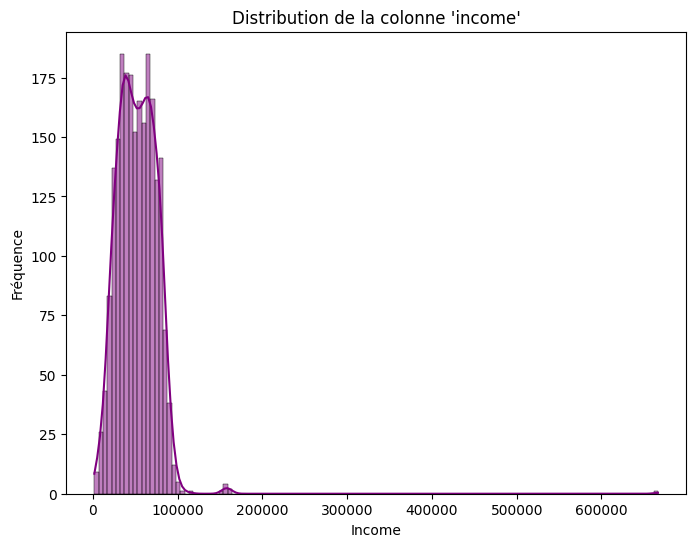

In [74]:
# Affichez un histogramme pour voir la distribution de Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'].dropna(), kde=True, color = 'purple')
plt.title("Distribution de la colonne 'income'")
plt.xlabel("Income")
plt.ylabel("Fréquence")
plt.show()

In [75]:
# Calculer la médiane de la colonne income
median_income = df['Income'].median()

# Remplir les valeurs manquantes avec la médiane (la médiane n'est pas sensible aux outliers)
df['Income'].fillna(median_income, inplace=True)

In [76]:
df.isna().sum()

Education              0
Marital_Status         0
Income                 0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Total_Kids             0
Age                    0
Total_Spending         0
dtype: int64

In [77]:
clients_salaire_600000 = df[df['Income'] > 600000]

nombre_clients = len(clients_salaire_600000)

print(f"Nombre de clients avec un salaire supérieur à 600 000 : {nombre_clients}")

Nombre de clients avec un salaire supérieur à 600 000 : 1


In [78]:
df = df[df['Income'] <= 600000]

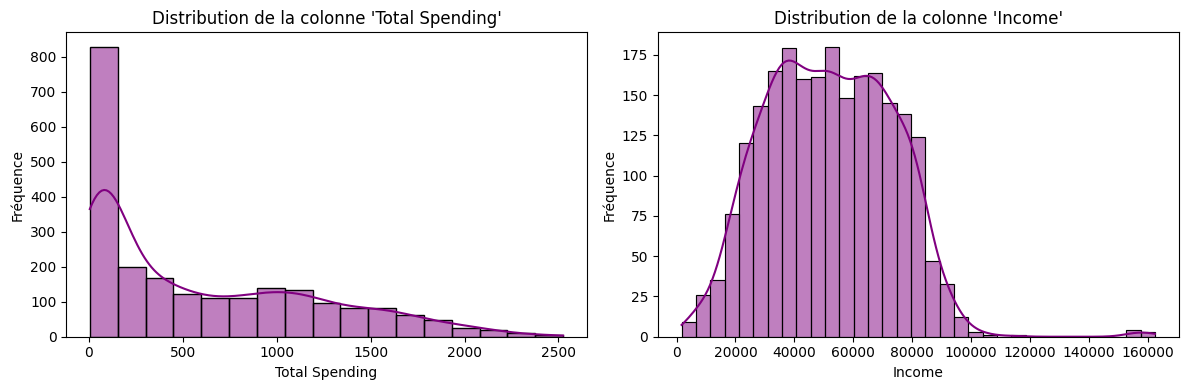

In [85]:
# Création des subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Deux graphiques côte à côte

# Premier histogramme : Total_Spending
sns.histplot(df['Total_Spending'], kde=True, color='purple', ax=axes[0])
axes[0].set_title("Distribution de la colonne 'Total Spending'")
axes[0].set_xlabel("Total Spending")
axes[0].set_ylabel("Fréquence")

# Deuxième histogramme : Income
sns.histplot(df['Income'].dropna(), kde=True, color='purple', ax=axes[1])
axes[1].set_title("Distribution de la colonne 'Income'")
axes[1].set_xlabel("Income")
axes[1].set_ylabel("Fréquence")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()


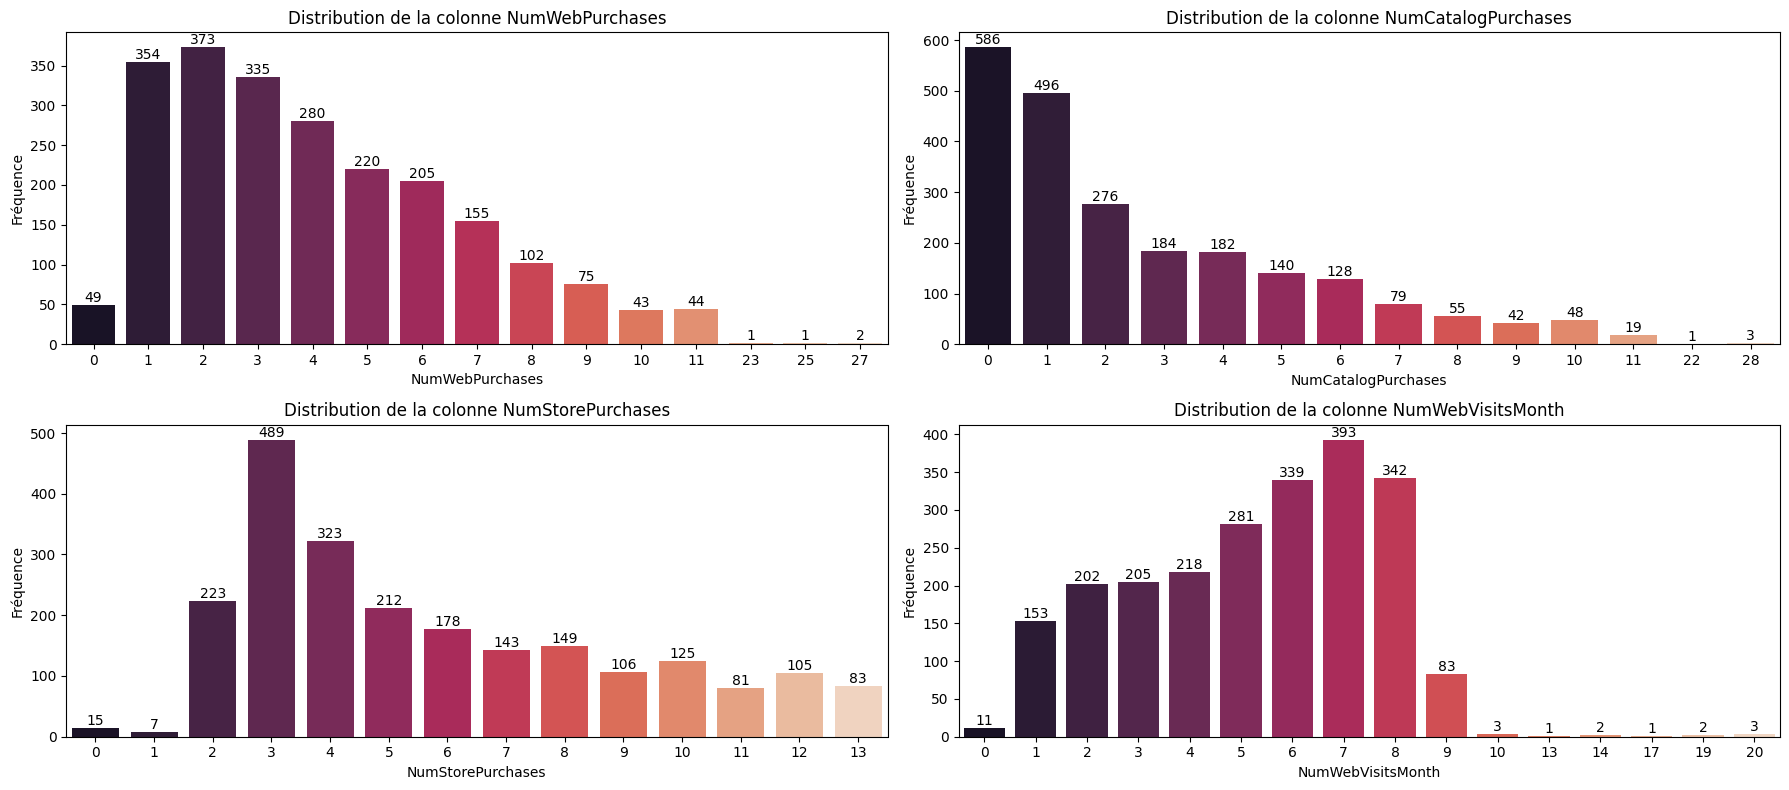

In [82]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
# Create a figure for subplots
plt.figure(figsize=(18, 8))

# Loop through each product column and create a histogram with KDE
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)

    graph = sns.countplot(data=df, x=df[column], palette=sns.color_palette("rocket", n_colors=len(df[column].unique())))
    plt.title(f"Distribution de la colonne {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")

    # Ajouter les valeurs de compte sur les barres
    for container in graph.containers:
        graph.bar_label(container)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()

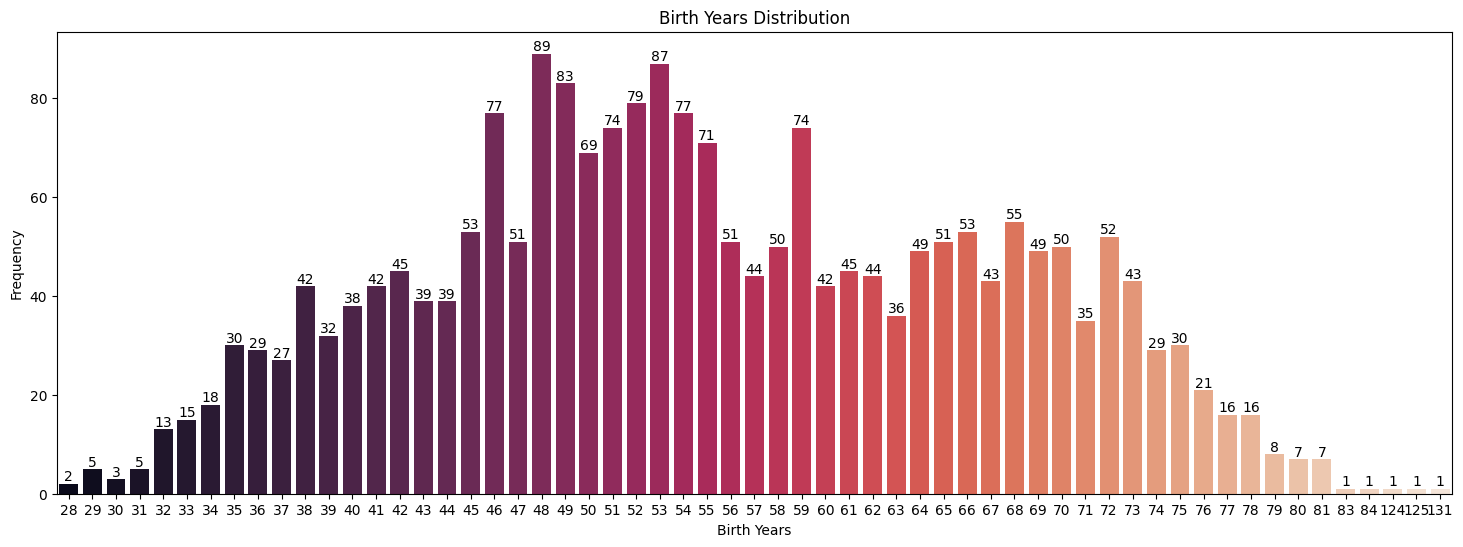

In [88]:
plt.figure(figsize=[18,6])
graph = sns.countplot(data=df , x= df['Age'] , palette=sns.color_palette("rocket", n_colors=len(df['Age'].unique())), hue=None)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Birth Years Distribution')
plt.xlabel('Birth Years')
plt.ylabel('Frequency')
plt.show()

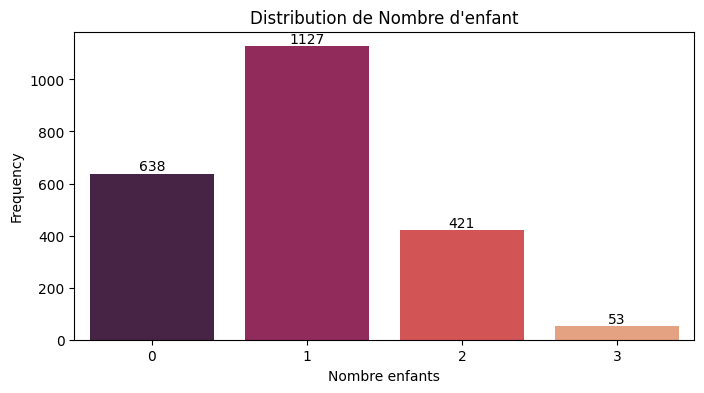

In [95]:
plt.figure(figsize=[8,4])
graph = sns.countplot(data=df , x= df['Total_Kids'] , palette=sns.color_palette("rocket", n_colors=len(df['Total_Kids'].unique())), hue=None)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Distribution de Nombre d\'enfant')
plt.xlabel('Nombre enfants')
plt.ylabel('Frequency')
plt.show()

C:\Users\Oumayma\AppData\Local\Temp\ipykernel_5624\555943976.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x='Income', y='Total_Spending', data=df, hue='Total_Kids', palette=sns.color_palette("rocket", n_colors=5))


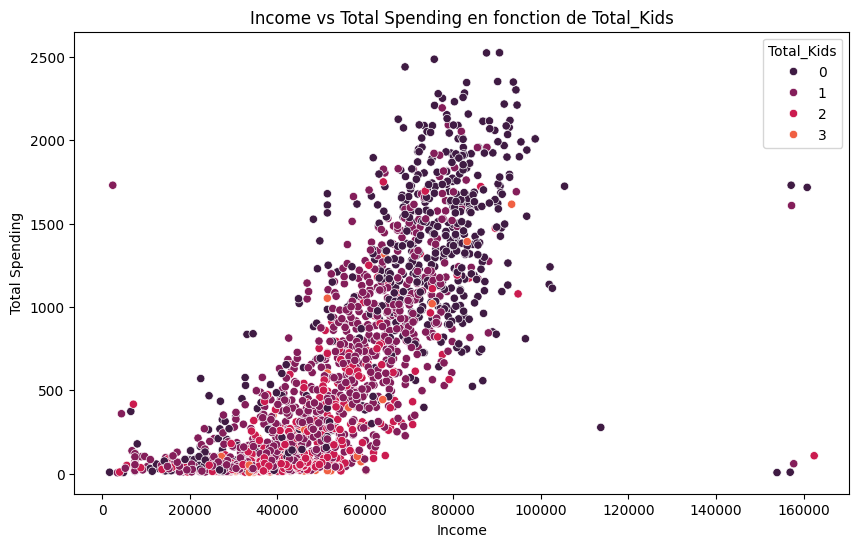

In [119]:
# Visualisation du scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spending', data=df, hue='Total_Kids', palette=sns.color_palette("rocket", n_colors=5))
plt.title('Income vs Total Spending en fonction de Total_Kids')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Total_Kids')
plt.show()

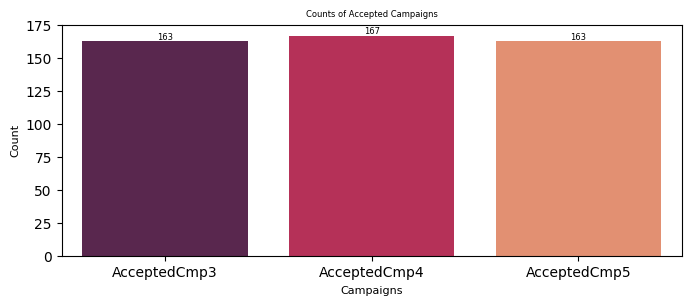

In [96]:
accepted_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate the count of '1's (accepted) for each column
accepted_counts = df[accepted_columns].sum()

# Create a bar plot
plt.figure(figsize=(8, 3))
sns.barplot(
    x=accepted_counts.index, 
    y=accepted_counts.values, 
    palette="rocket"
)

# Add labels and title
plt.title("Counts of Accepted Campaigns", fontsize=6)
plt.xlabel("Campaigns", fontsize=8)
plt.ylabel("Count", fontsize=8)

# Add counts on top of the bars
for i, count in enumerate(accepted_counts.values):
    plt.text(i, count, int(count), ha='center', va='bottom', fontsize=6)

# Display the plot
plt.show()


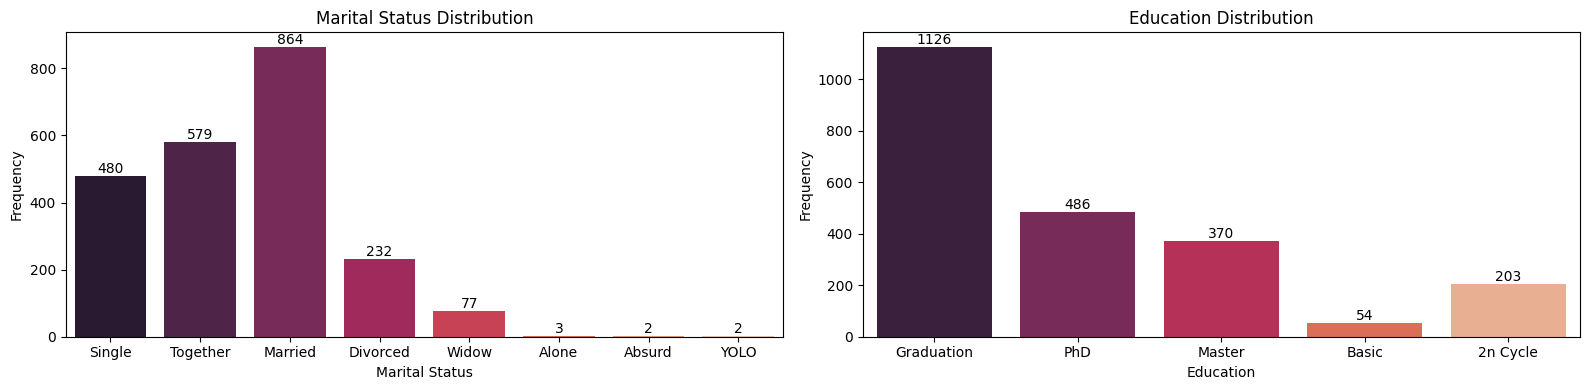

In [97]:
plt.figure(figsize=[16, 4]) 

# Marital Status Distribution
plt.subplot(1, 2, 1)  #  1er plot
graph1 = sns.countplot(data=df, x='Marital_Status',  palette=sns.color_palette("rocket", n_colors=len(df['Marital_Status'].unique())))
for container in graph1.containers:
    graph1.bar_label(container)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

#Educations Distribution
plt.subplot(1, 2, 2)  # 2ème plot
graph2 = sns.countplot(data=df, x='Education',  palette=sns.color_palette("rocket", n_colors=len(df['Education'].unique())))
for container in graph2.containers:
    graph2.bar_label(container)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [107]:
df = df[df['Marital_Status'] != 'Absurd']
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

Text(0, 0.5, 'Frequency')

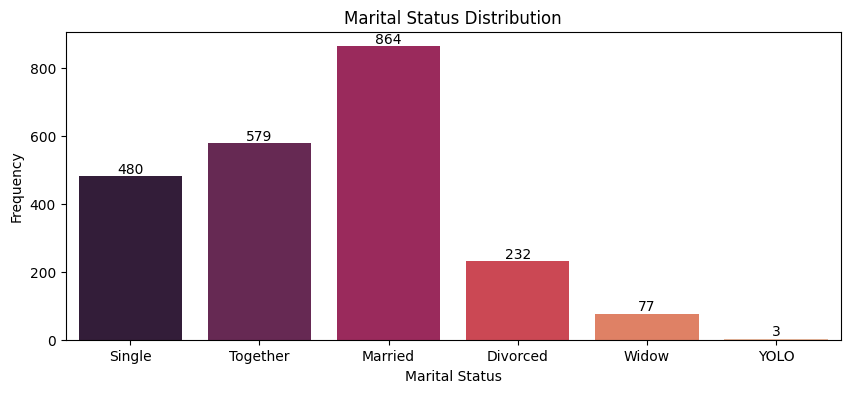

In [109]:
plt.figure(figsize=[10, 4]) 

graph = sns.countplot(data=df, x='Marital_Status',  palette=sns.color_palette("rocket", n_colors=len(df['Marital_Status'].unique())))
for container in graph1.containers:
    graph.bar_label(container)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

In [110]:
encoder = LabelEncoder()
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df['Education'] = encoder.fit_transform(df['Education'])

In [111]:
df.head()

,Education,Marital_Status,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Kids,Age,Total_Spending
0,2,2,58138.0,8,10,4,7,0,0,0,0,67,1617
1,2,2,46344.0,1,1,2,5,0,0,0,2,70,27
2,2,3,71613.0,8,2,10,4,0,0,0,0,59,776
3,2,3,26646.0,2,0,4,6,0,0,0,1,40,53
4,4,1,58293.0,5,3,6,5,0,0,0,1,43,422


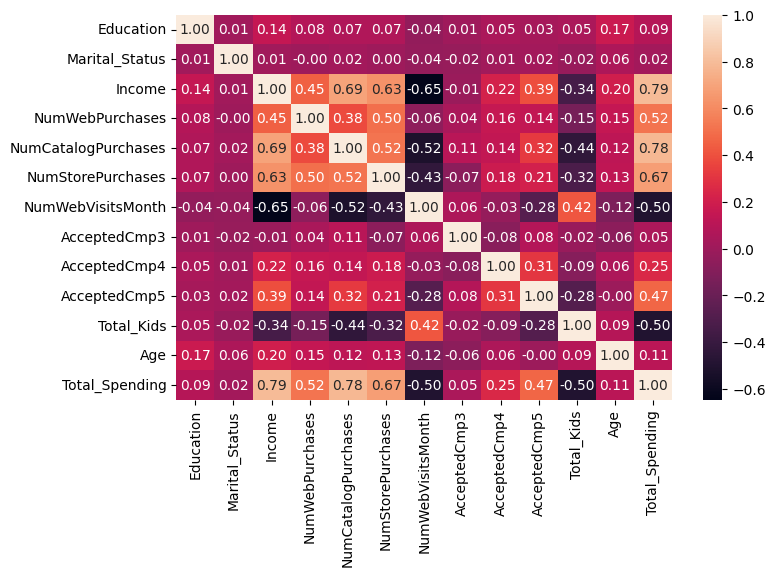

In [115]:
correlation_matrix = df.corr()
plt.figure(figsize=[8, 5])

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap=sns.color_palette("rocket", as_cmap=True) )
plt.show()

In [ ]:
data = df.copy()
scaler = StandardScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data), columns= data.columns)
data_scaled.head()

,Education,Marital_Status,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Kids,Age,Total_Spending
0,-0.350021,0.247003,0.289300,1.408094,2.514518,-0.550712,0.692951,-0.280343,-0.284036,-0.279414,-1.265664,0.985131,1.679778
1,-0.350021,0.247003,-0.261673,-1.110104,-0.568036,-1.165762,-0.131806,-0.280343,-0.284036,-0.279414,1.395324,1.235661,-0.960747
2,-0.350021,1.185110,0.918803,1.408094,-0.225530,1.294435,-0.544185,-0.280343,-0.284036,-0.279414,-1.265664,0.317053,0.283123
3,-0.350021,1.185110,-1.181892,-0.750361,-0.910542,-0.550712,0.280572,-0.280343,-0.284036,-0.279414,0.064830,-1.269632,-0.917569
4,1.427496,-0.691104,0.296541,0.328866,0.116976,0.064337,-0.131806,-0.280343,-0.284036,-0.279414,0.064830,-1.019103,-0.304768


## Dendrogramme

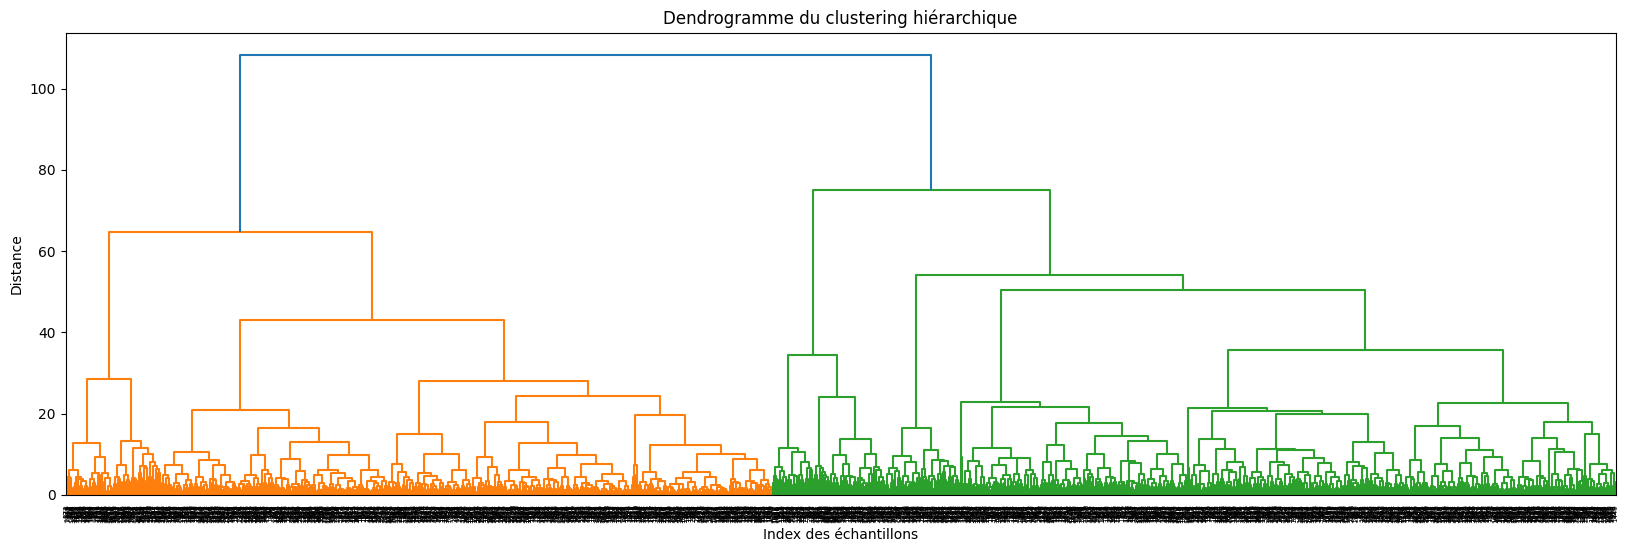

In [130]:
z = sch.linkage(data_scaled, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(20, 6))
sch.dendrogram(z)
plt.title('Dendrogramme du clustering hiérarchique')
plt.xlabel('Index des échantillons')
plt.ylabel('Distance')
plt.show()

### PCA: Technique de réduction de dimensionnalité linéaire

In [122]:
# Réduction de dimension avec PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 3. Convertir en DataFrame
df_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(2)])
df_pca.describe()

,PC1,PC2
count,2.237000e+03,2.237000e+03
mean,1.207002e-16,1.270528e-17
std,2.087639e+00,1.148349e+00
min,-4.942763e+00,-3.685332e+00
25%,-1.911769e+00,-8.146179e-01
50%,-4.132334e-01,-2.381980e-02
75%,1.685436e+00,7.765839e-01
max,6.381831e+00,4.075188e+00


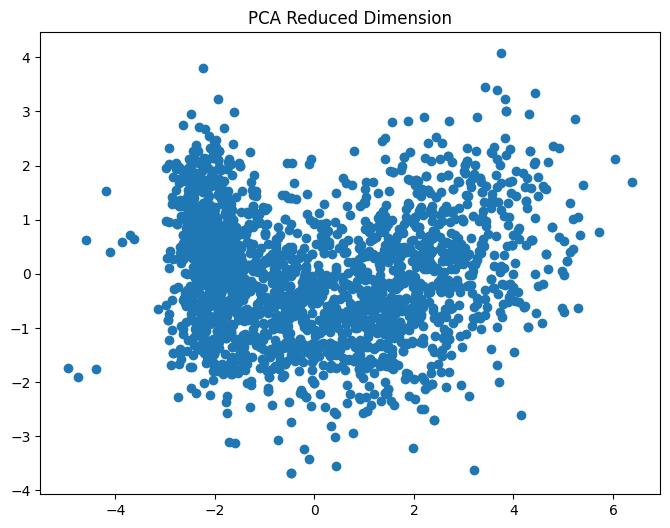

In [123]:
#A 2D Projection Of Data In The Reduced Dimension
x = df_pca["PC1"]
y = df_pca["PC2"]
#To plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(x,y, marker="o")
ax.set_title("PCA Reduced Dimension")
plt.show()

In [135]:
# Initialisation K-Means++
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) 
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [136]:
# Récupérer les labels des clusters
labels_kmeans = kmeans.labels_

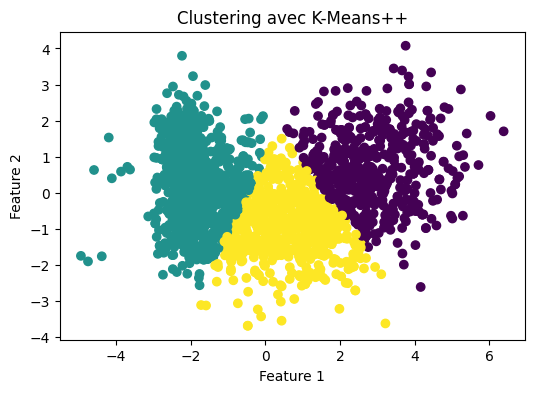

In [137]:
# Tracer les résultats du clustering
plt.figure(figsize=(6, 4))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels_kmeans) 

plt.title('Clustering avec K-Means++')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Chercher le nombre optimal de cluster

For n_clusters = 2 The average silhouette_score is : 0.5137197400246
For n_clusters = 3 The average silhouette_score is : 0.429301938332412
For n_clusters = 4 The average silhouette_score is : 0.37772209076529956
For n_clusters = 5 The average silhouette_score is : 0.36292090918866016
For n_clusters = 6 The average silhouette_score is : 0.36090381004640243


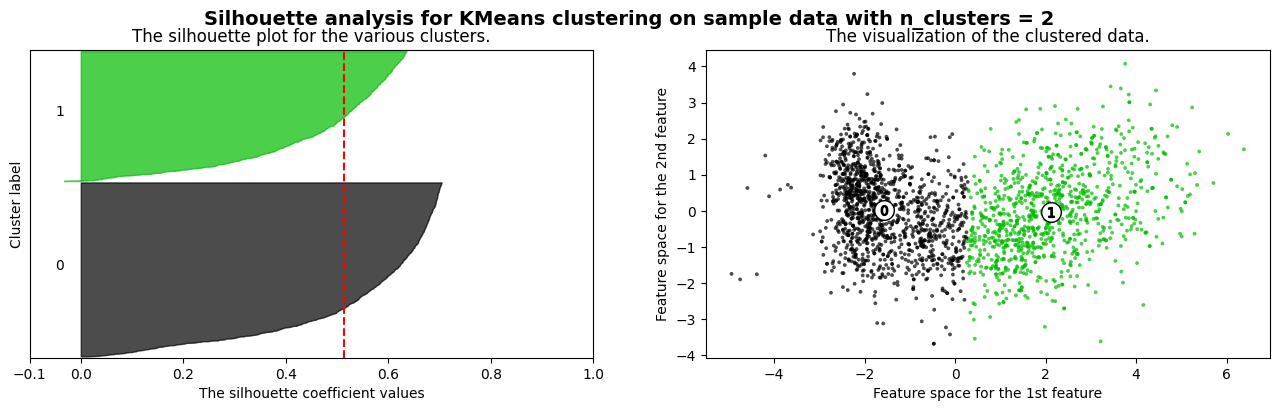

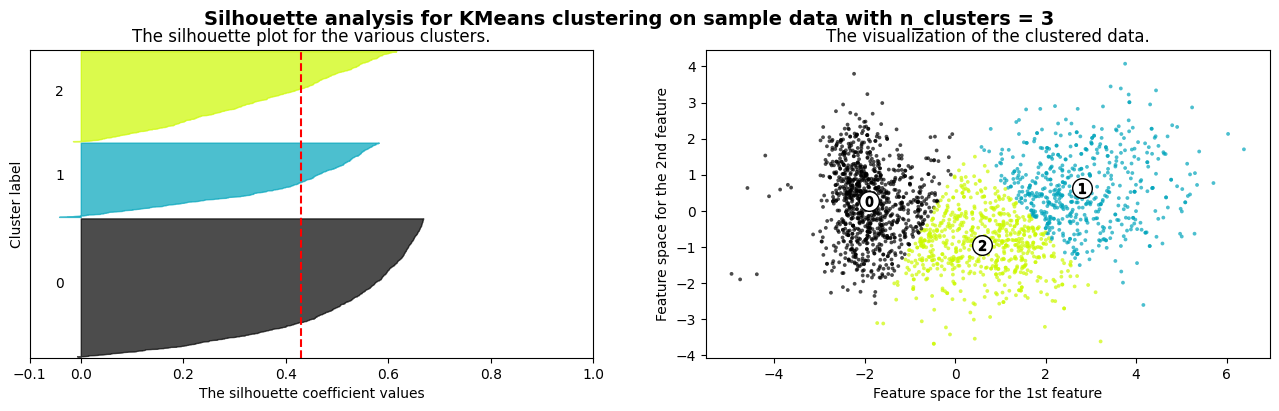

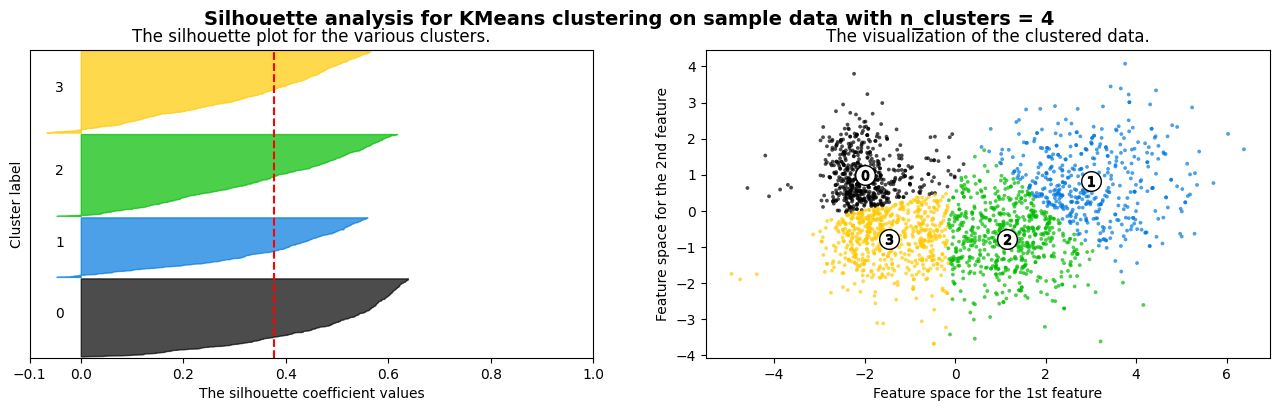

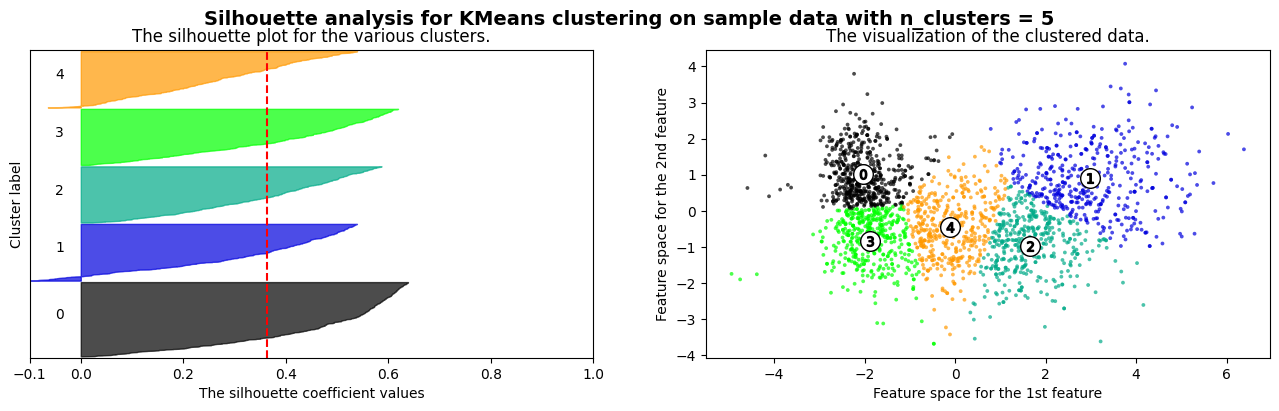

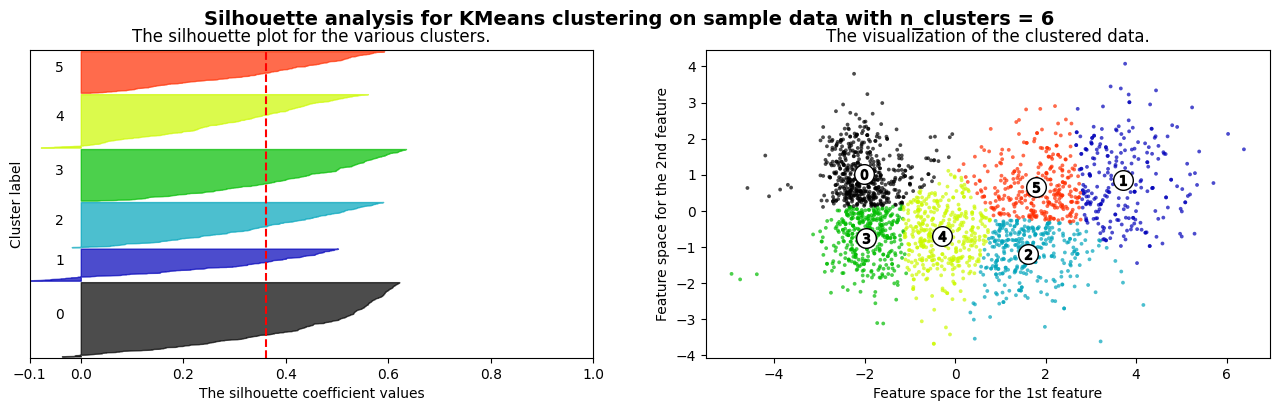

In [138]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 4)


    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_pca['PC1'], df_pca['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

D'après les scores de silhouette, le nombre optimal du cluster est 6

In [139]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

In [140]:
df_tsne.head()

,TSNE1,TSNE2
0,25.121983,-5.532370
1,-27.264965,-31.040157
2,19.685522,0.246761
3,-39.978050,-2.417578
4,-12.606266,6.829113


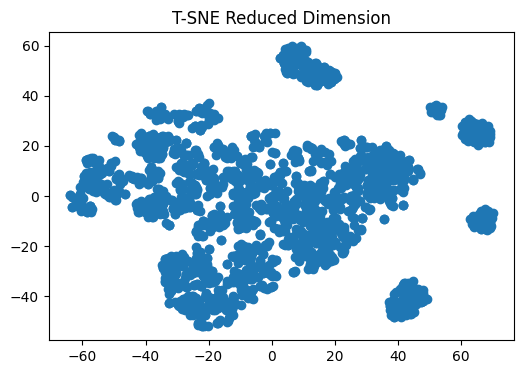

In [141]:
#A 3D Projection Of Data In The Reduced Dimension
x = df_tsne["TSNE1"]
y = df_tsne["TSNE2"]
#To plot
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.scatter(x,y, marker="o")
ax.set_title("T-SNE Reduced Dimension")
plt.show()

In [142]:
# Initialisation K-Means++
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=25) 
kmeans.fit(df_tsne)

# Récupérer les labels des clusters
labels_kmeans = kmeans.labels_

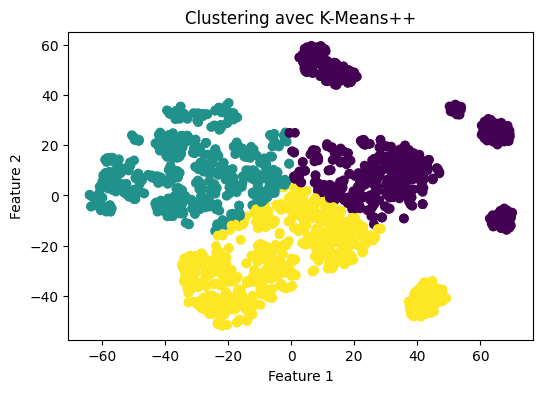

In [143]:
# Tracer les résultats du clustering
plt.figure(figsize=(6, 4))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels_kmeans) 
plt.title('Clustering avec K-Means++')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.40454975
For n_clusters = 3 The average silhouette_score is : 0.35606682
For n_clusters = 4 The average silhouette_score is : 0.3825659
For n_clusters = 5 The average silhouette_score is : 0.42848492
For n_clusters = 6 The average silhouette_score is : 0.4572368


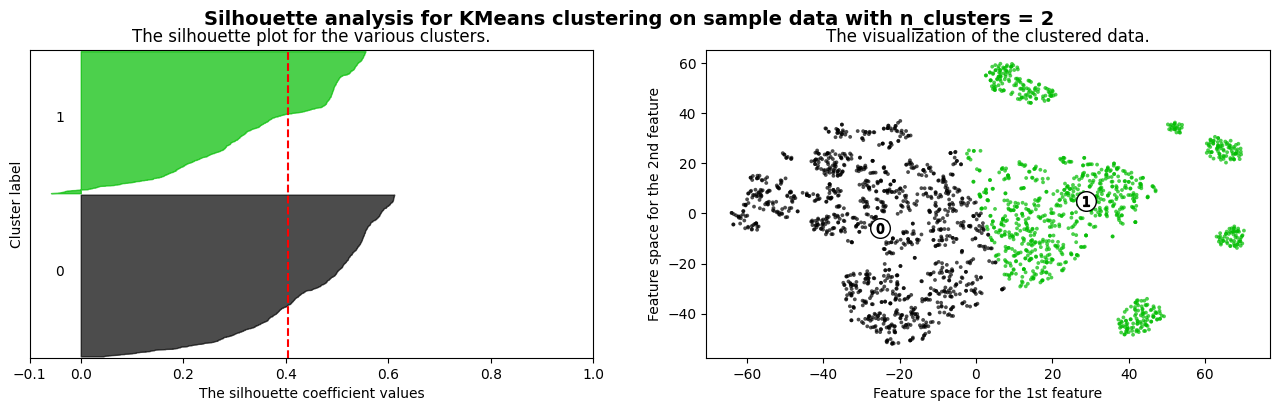

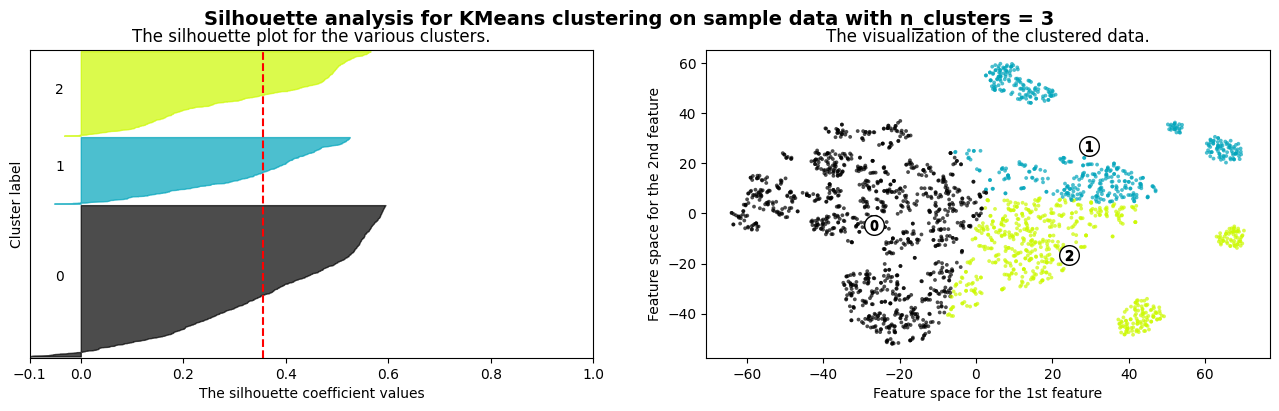

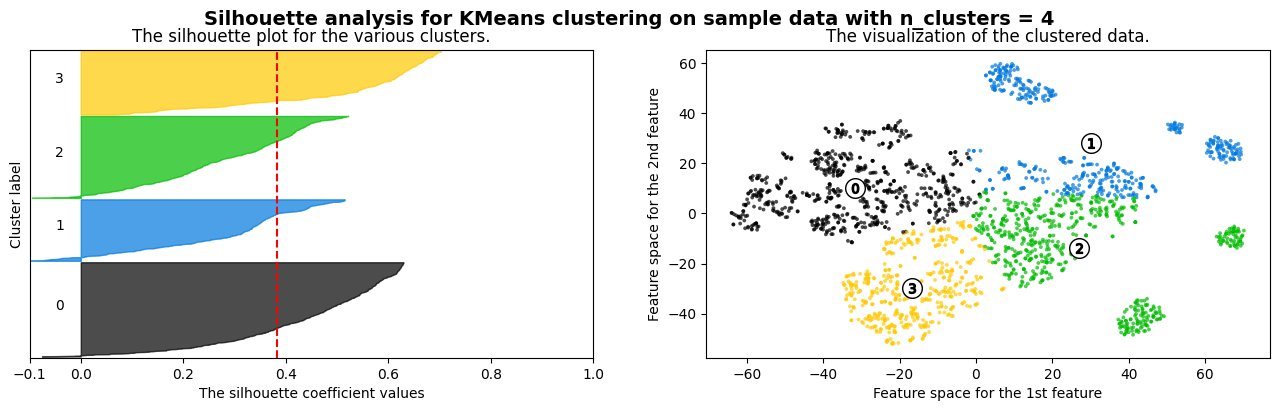

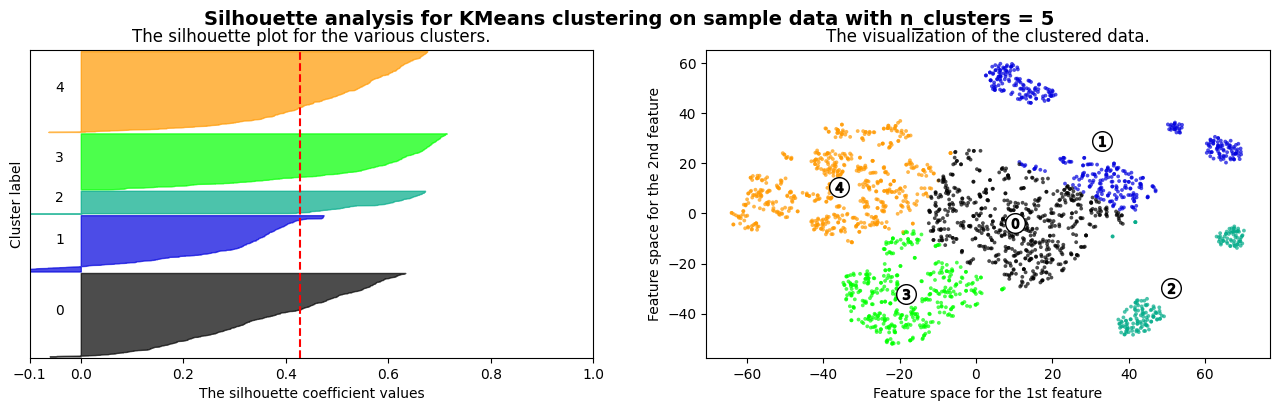

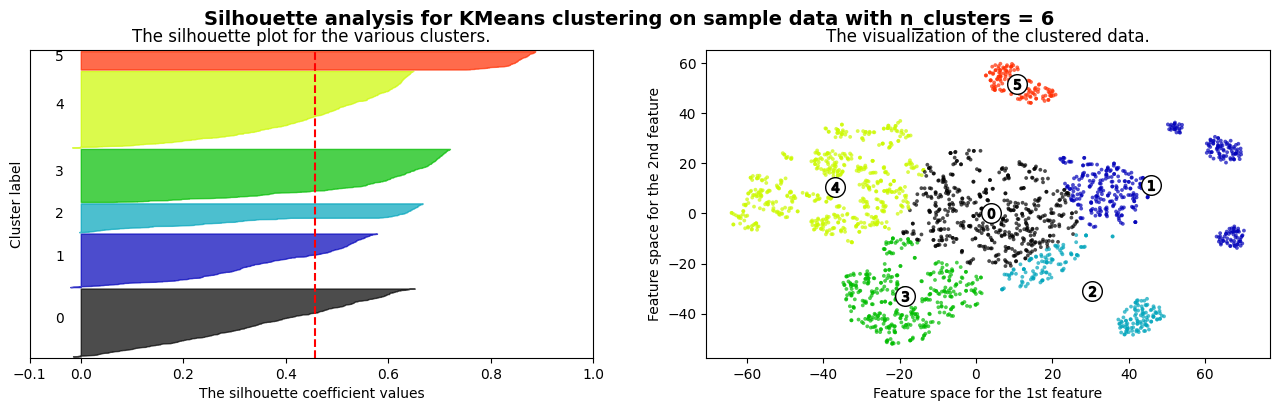

In [144]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 4)


    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_tsne) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_tsne, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_tsne['TSNE1'], df_tsne['TSNE2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Optimale
For n_clusters = 3 The average silhouette_score is : 0.35606682


## DBSCAN

In [166]:
clusters = DBSCAN(eps = 0.5 , min_samples = 4).fit(df_pca) # Choix aléatoire de epsilon
Counter(clusters.labels_)

Counter({0: 2203, -1: 19, 2: 7, 1: 4, 3: 4})

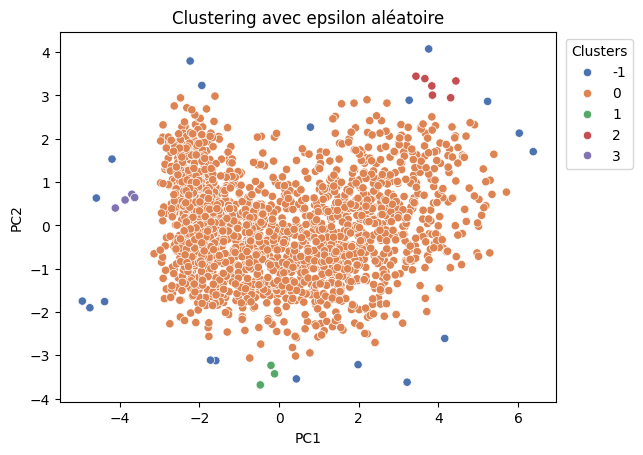

In [167]:
p = sns.scatterplot(data = df_pca, x = "PC1", y = "PC2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('Clustering avec epsilon aléatoire')
plt.show()

### Déterminer le paramètre epsilon

In [151]:
nbrs = NearestNeighbors(n_neighbors = 5).fit(df_pca)

In [152]:
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_pca)

# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

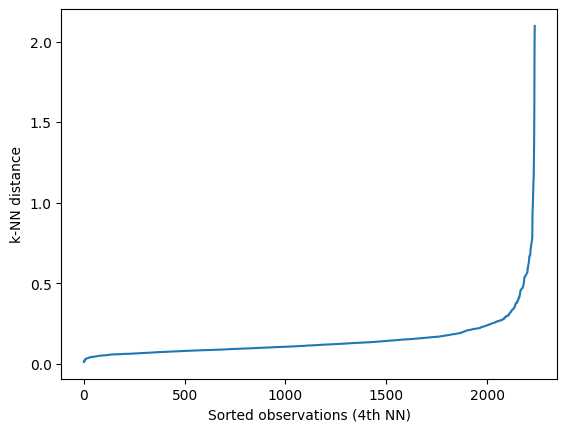

In [153]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [154]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.6756331114055482


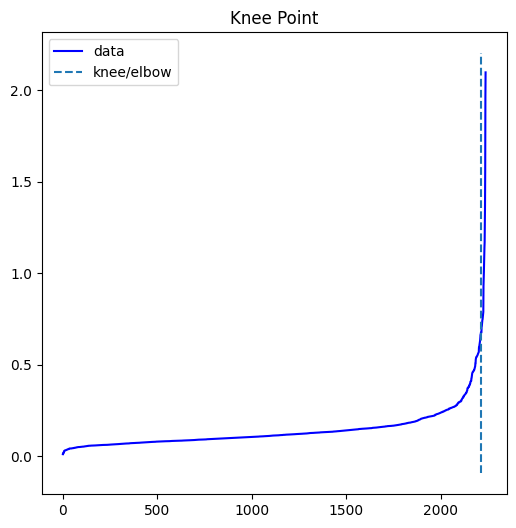

In [155]:
kneedle.plot_knee()
plt.show()

In [158]:
clusters_eps = DBSCAN(eps = 0.6756331114055482 , min_samples = 4).fit(df_pca)
Counter(clusters_eps.labels_)

Counter({0: 2223, -1: 9, 1: 5})

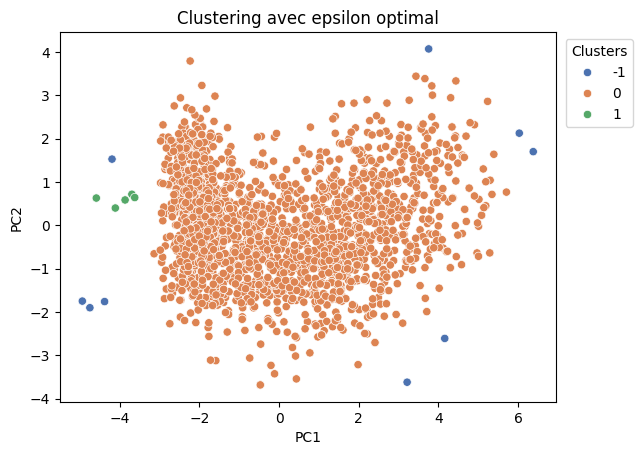

In [159]:
p = sns.scatterplot(data = df_pca, x = "PC1", y = "PC2", hue = clusters_eps.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('Clustering avec epsilon optimal')
plt.show()